### <center> CSNB5213 - Machine Learning and Data Analytics </center>

#### <center> Group Project </center>

# <center> Case Study: Phishing Email Detection </center>

### Group Members
- MUHAMMAD FAKRUL AIMAN BIN MOHAMAD ROSLANI (CS01082354)
- WAFRY BIN KHAIRUL ZIAD  (CS01082361)
- MUHAMMAD DANISH BIN KHAIRUNNADIM (CS01082346)
- MUHAMAD ASYRAF FAHMI BIN MOHD SAIFUL HAZMI (SW01082352)
- PUTERA AMIRUL HAQIM BIN RIDZUAN LU (SW01082360)

#### Libraries Imported within every code

### Load the dataset

In [1]:
import pandas as pd

data = pd.read_csv("C:\\Users\\fakru\\Downloads\\email_phishing_data.csv")

print(data.head())

print(data.dtypes)

   num_words  num_unique_words  num_stopwords  num_links  num_unique_domains  \
0        140                94             52          0                   0   
1          5                 5              1          0                   0   
2         34                32             15          0                   0   
3          6                 6              2          0                   0   
4          9                 9              2          0                   0   

   num_email_addresses  num_spelling_errors  num_urgent_keywords  label  
0                    0                    0                    0      0  
1                    0                    0                    0      0  
2                    0                    0                    0      0  
3                    0                    0                    0      0  
4                    0                    0                    0      0  
num_words              int64
num_unique_words       int64
num_stopwords    

In [2]:
#statistical insights of numerical columns
data.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


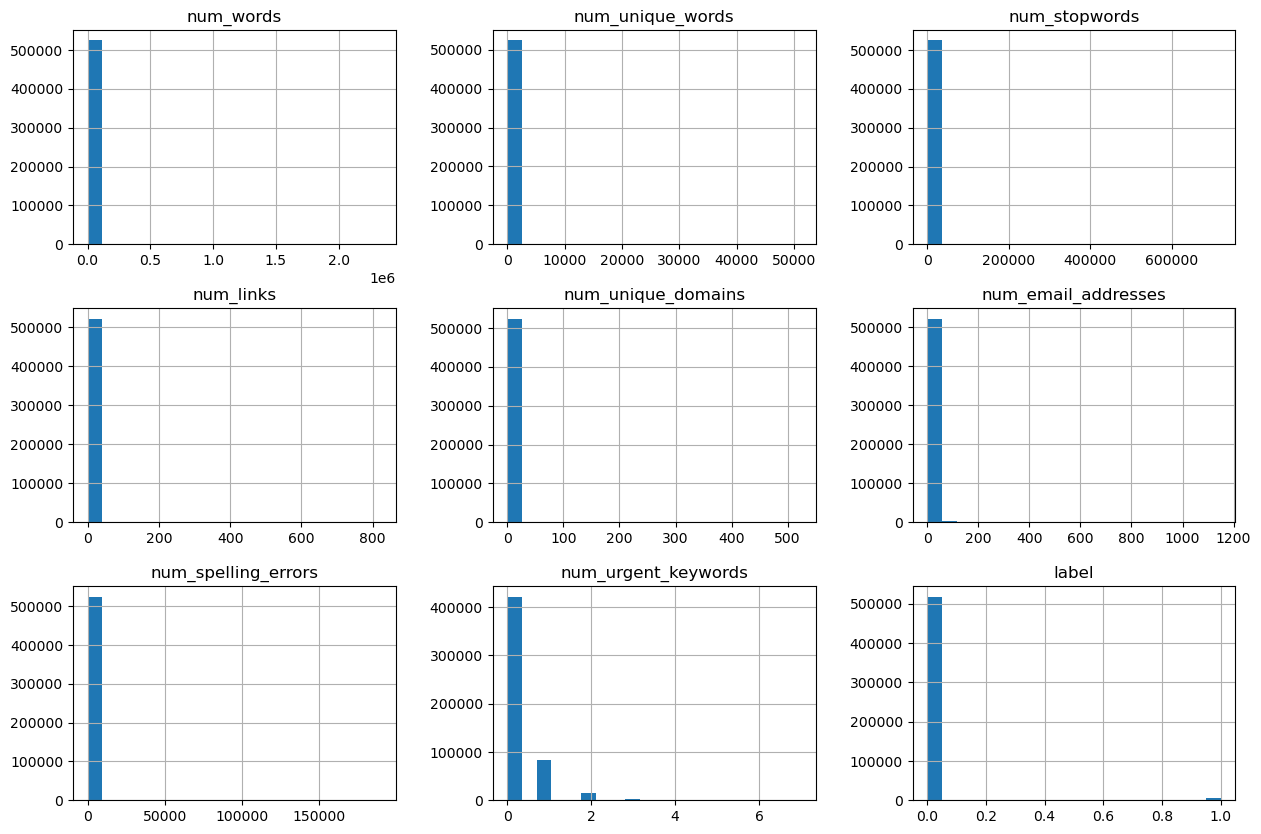

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#Plotting histogram for numerical columns in the dataset
data.hist(figsize=(15, 10), bins=20)
plt.show()

In [5]:
#Summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


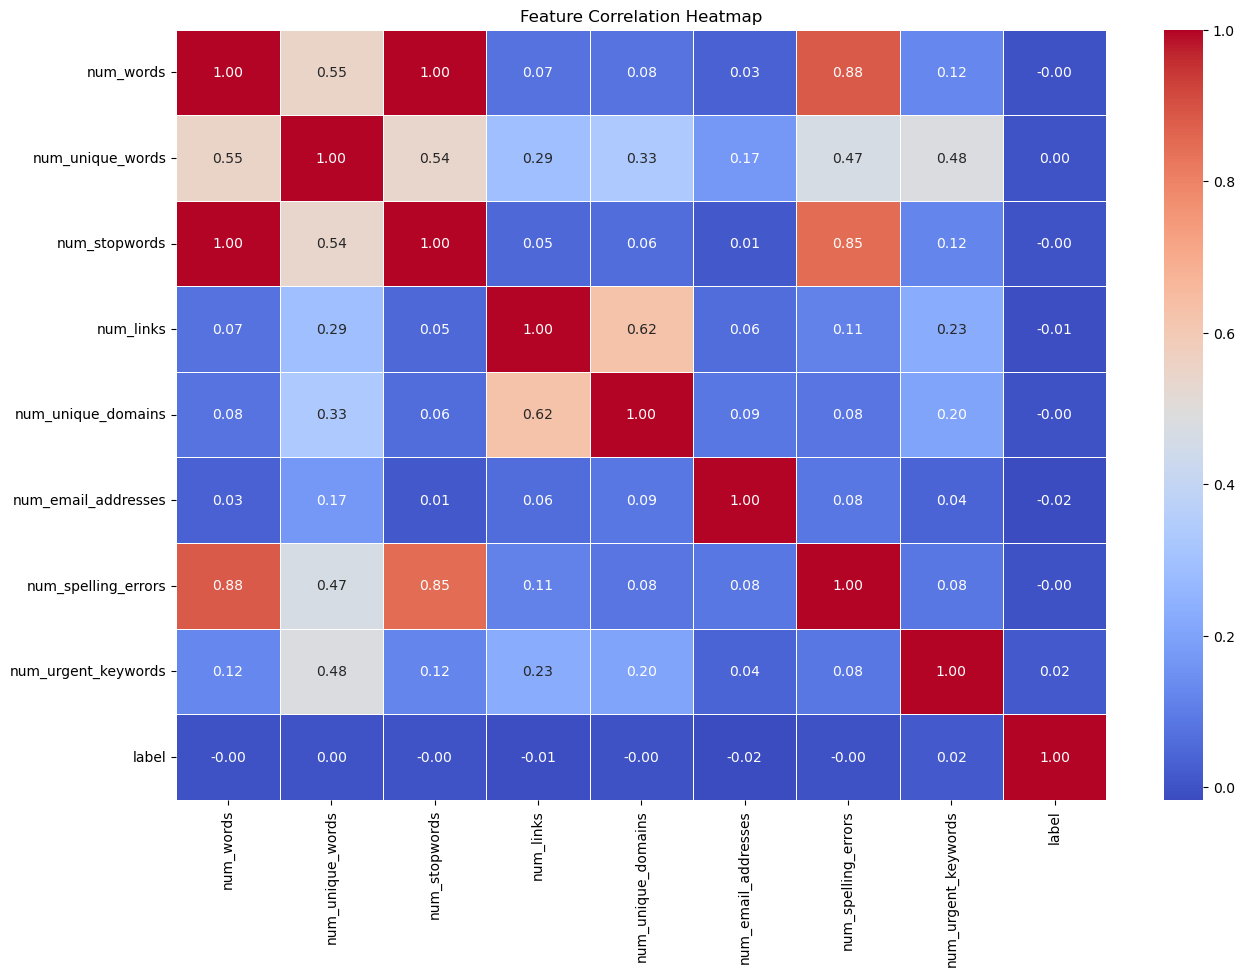

In [6]:
# Step 2.1.2: Plotting feature correlation heatmap
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


<Figure size 1500x1000 with 0 Axes>

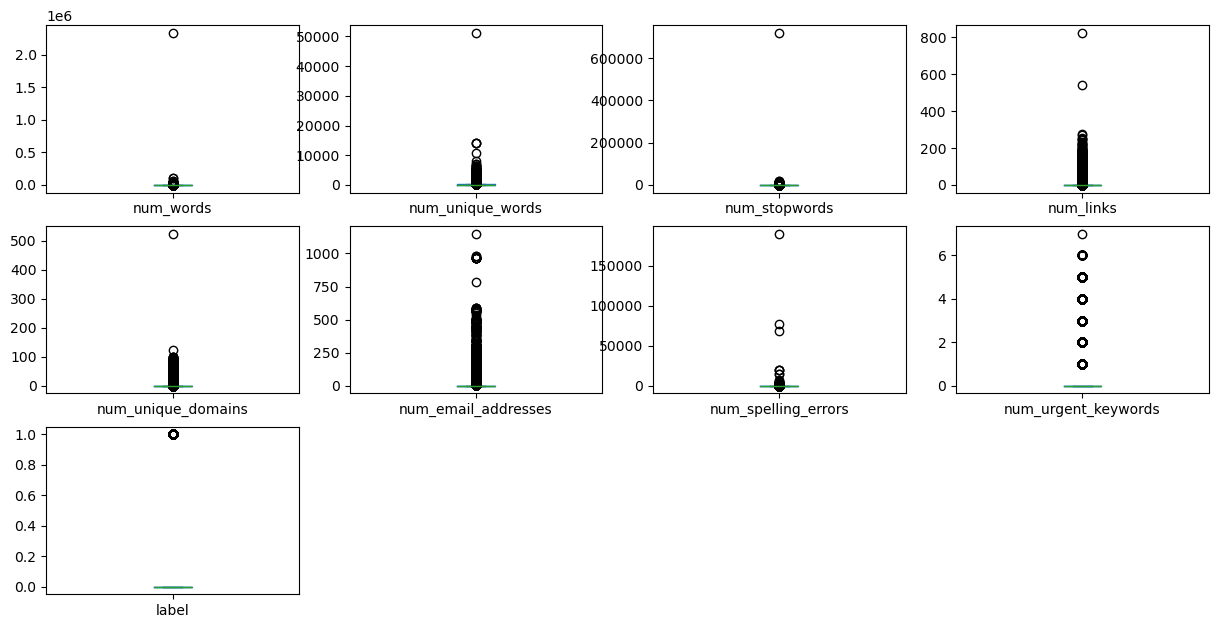

In [7]:
# Step 2.1.5: Plotting boxplots to check for outliers
plt.figure(figsize=(15, 10))
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10), sharex=False, sharey=False)
plt.show()

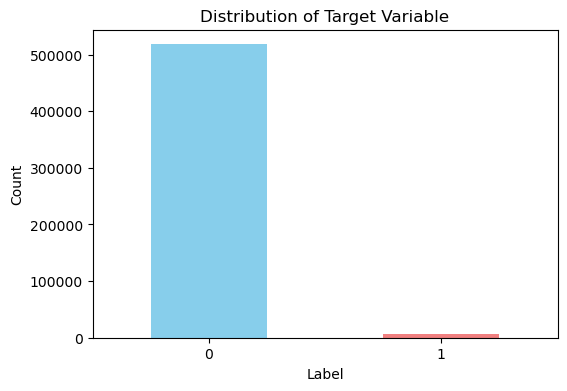

<Figure size 1500x1000 with 0 Axes>

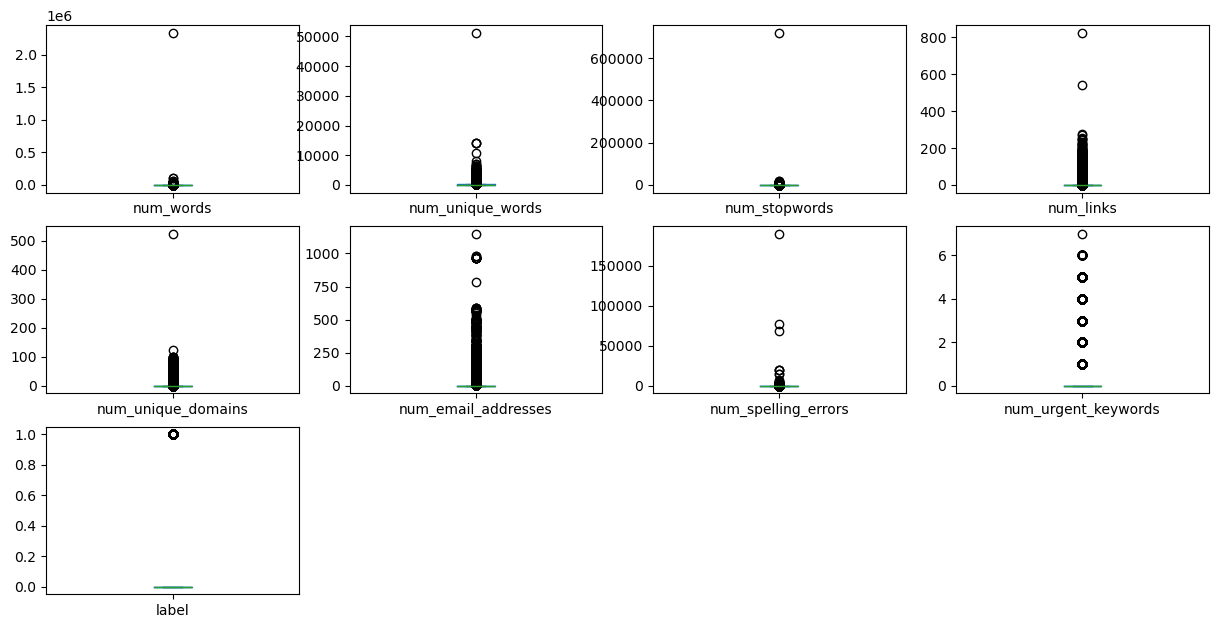

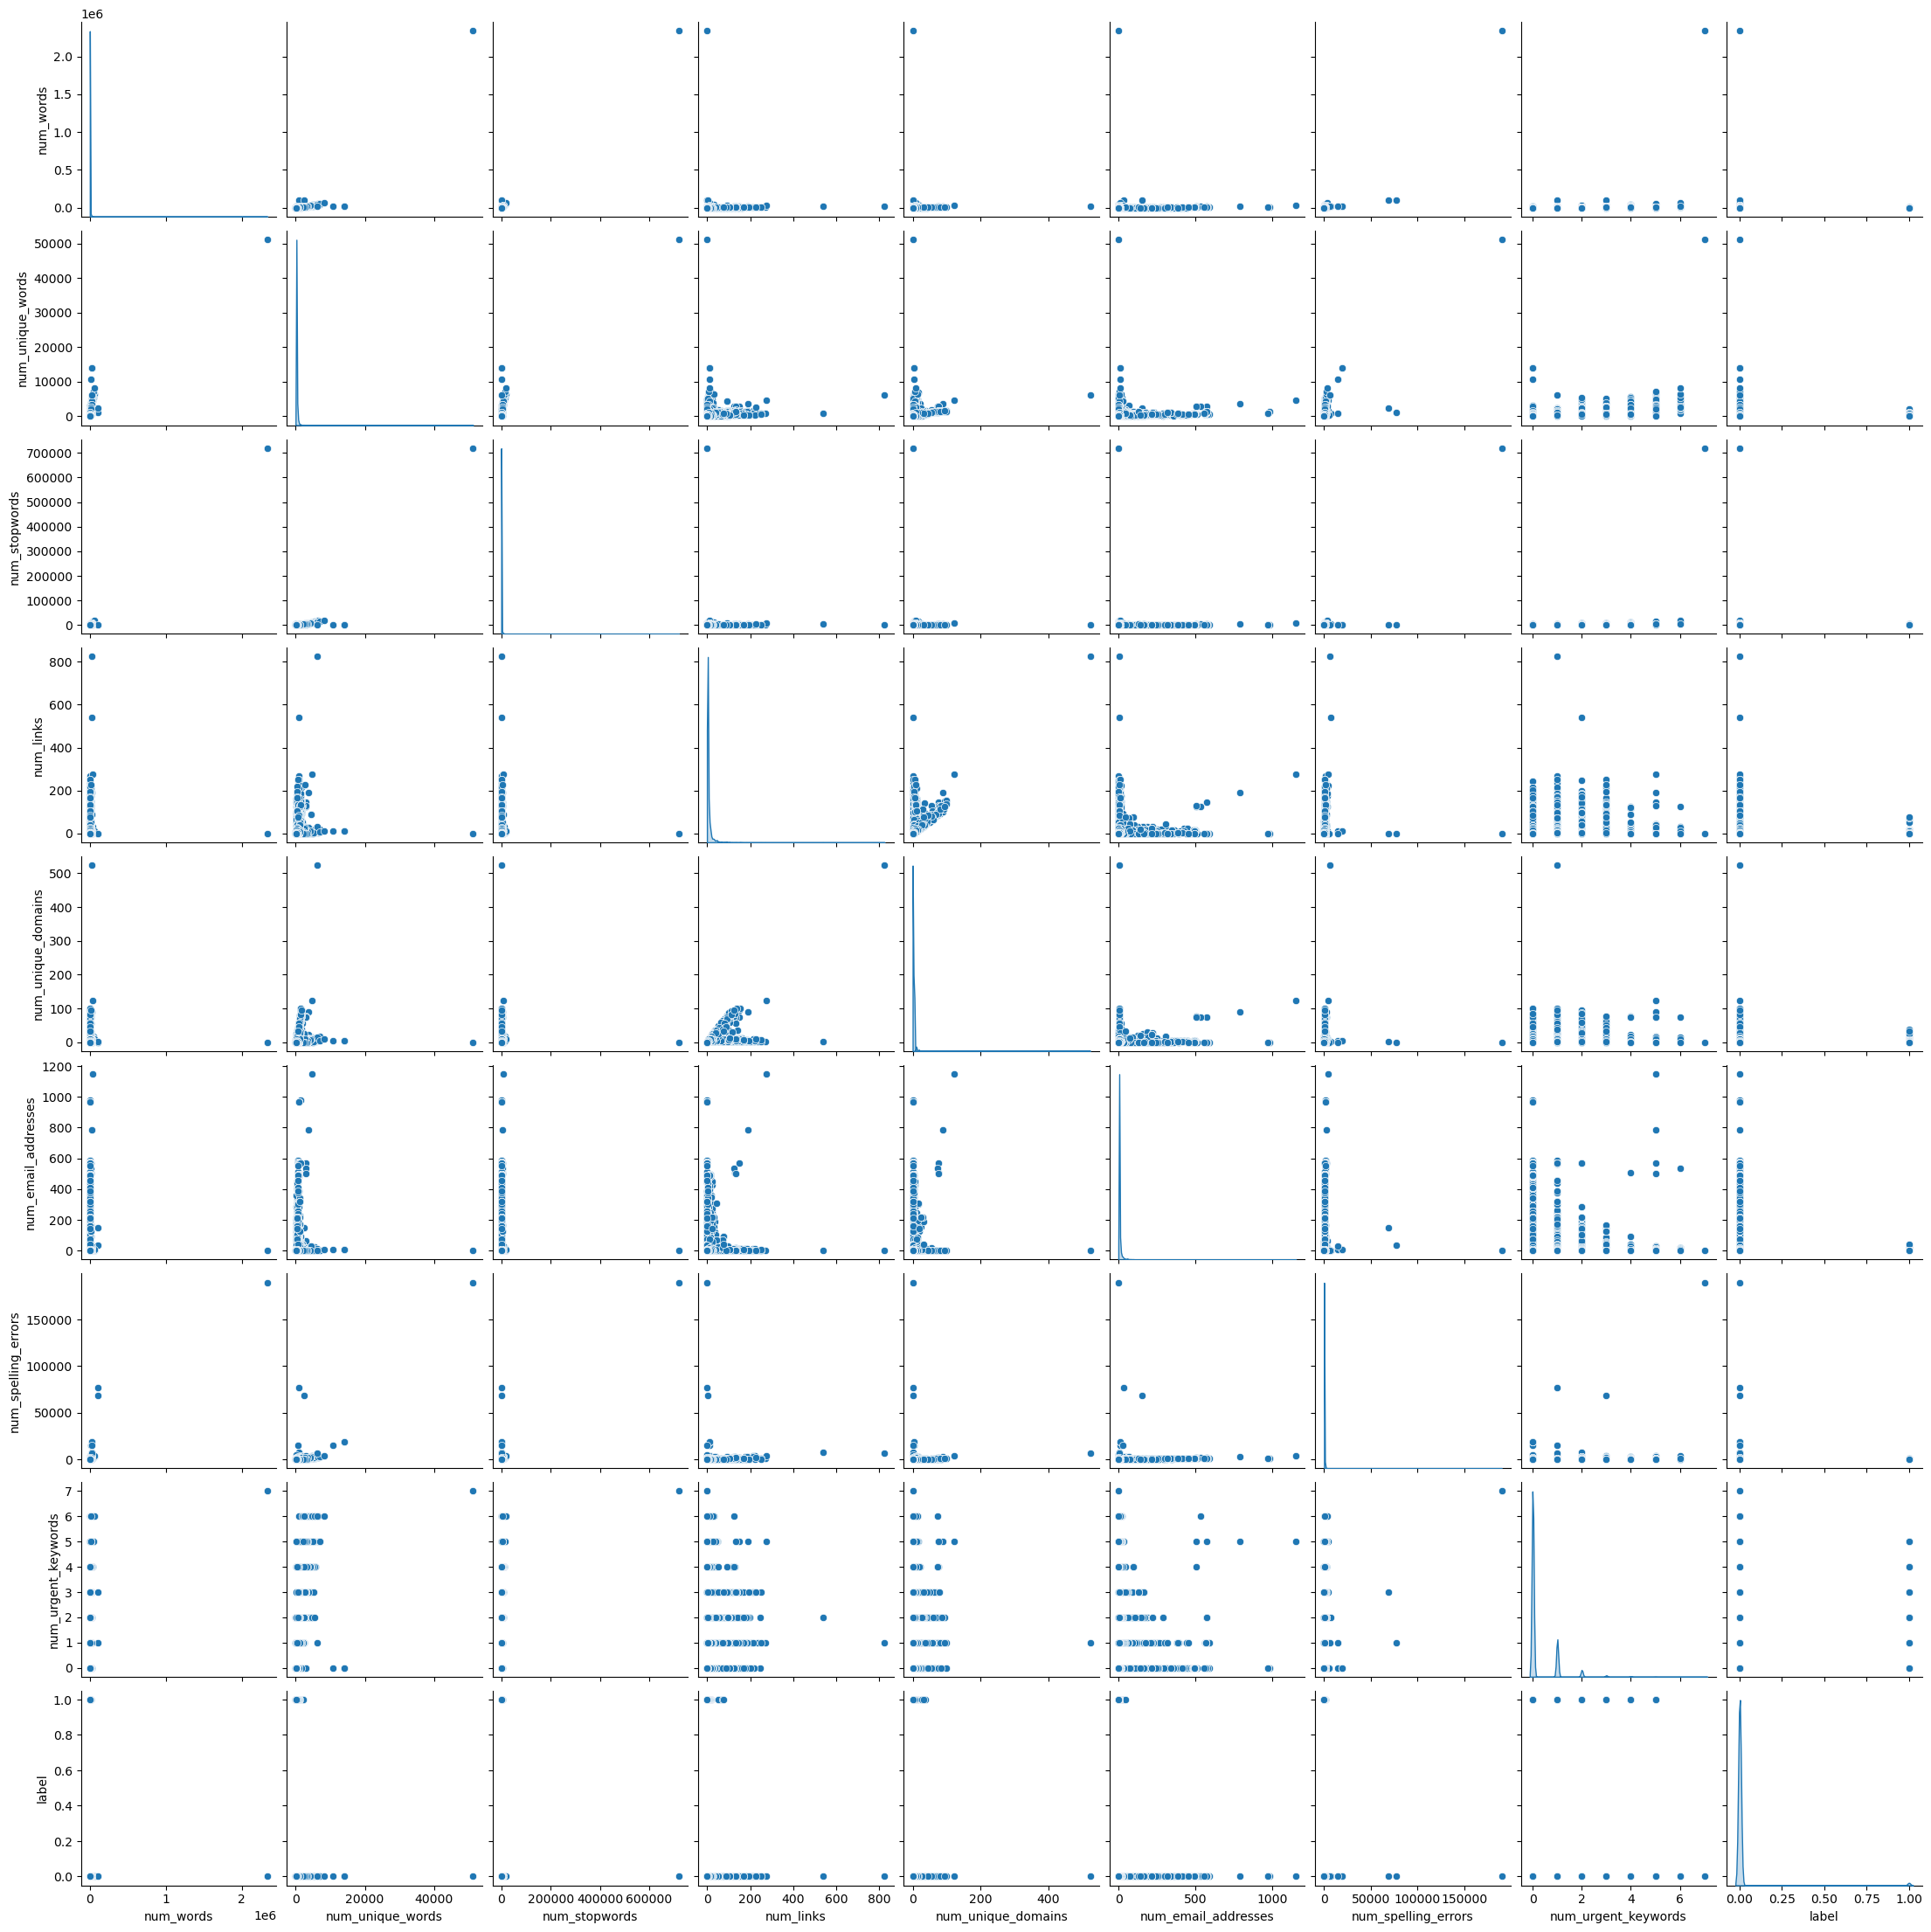

In [1]:
#plot 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:\\Users\\fakru\\Downloads\\email_phishing_data.csv")

plt.figure(figsize=(6, 4))
data['label'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Target Variable')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(15, 10))
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10), sharex=False, sharey=False)
plt.show()

sns.pairplot(data, diag_kind='kde', markers='o')
plt.show()


### Handling missing values

In [2]:
print(data.isnull().sum())

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print(data_imputed.isnull().sum())

num_words              0
num_unique_words       0
num_stopwords          0
num_links              0
num_unique_domains     0
num_email_addresses    0
num_spelling_errors    0
num_urgent_keywords    0
label                  0
dtype: int64
num_words              0
num_unique_words       0
num_stopwords          0
num_links              0
num_unique_domains     0
num_email_addresses    0
num_spelling_errors    0
num_urgent_keywords    0
label                  0
dtype: int64


### Clipping Outliers (Z-score method)

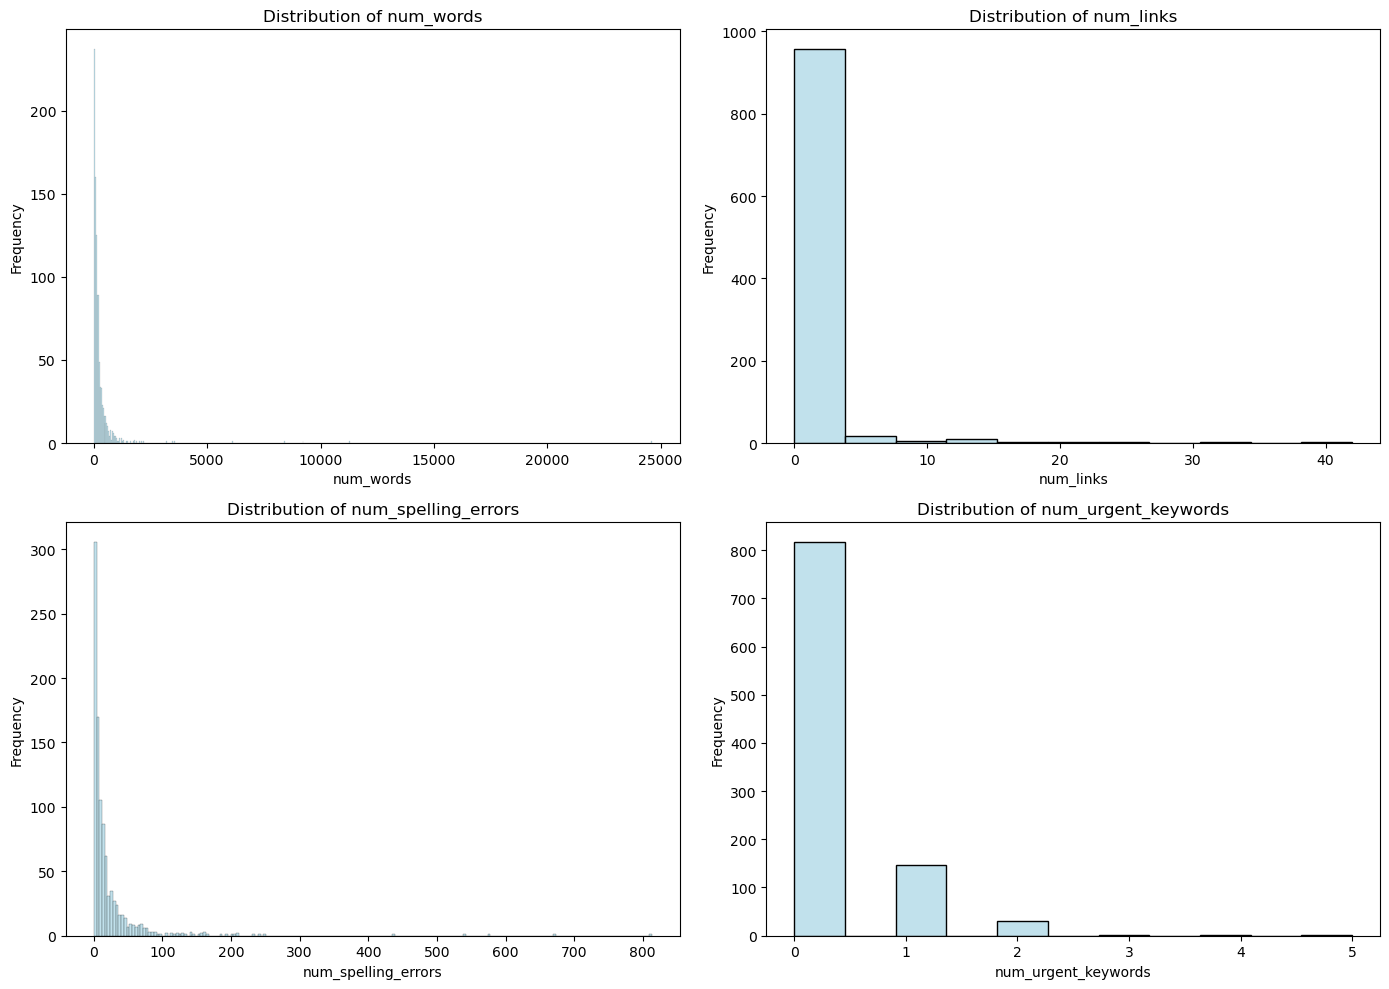

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['num_words', 'num_links', 'num_spelling_errors', 'num_urgent_keywords']

df_sample = data.sample(n=1000, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(df_sample[col], ax=axes[i], kde=False, color='lightblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [4]:
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores 
z_scores = np.abs(zscore(data_imputed))

# Set a threshold for Z-scores to identify outliers
threshold = 3

# Remove rows where any feature has a Z-score above the threshold
data_no_outliers = data_imputed[(z_scores < threshold).all(axis=1)]

print(f"Original data shape: {data_imputed.shape}")
print(f"Data shape after clipping outliers: {data_no_outliers.shape}")


Original data shape: (524846, 9)
Data shape after clipping outliers: (489364, 9)


Outliers clipped for selected features.


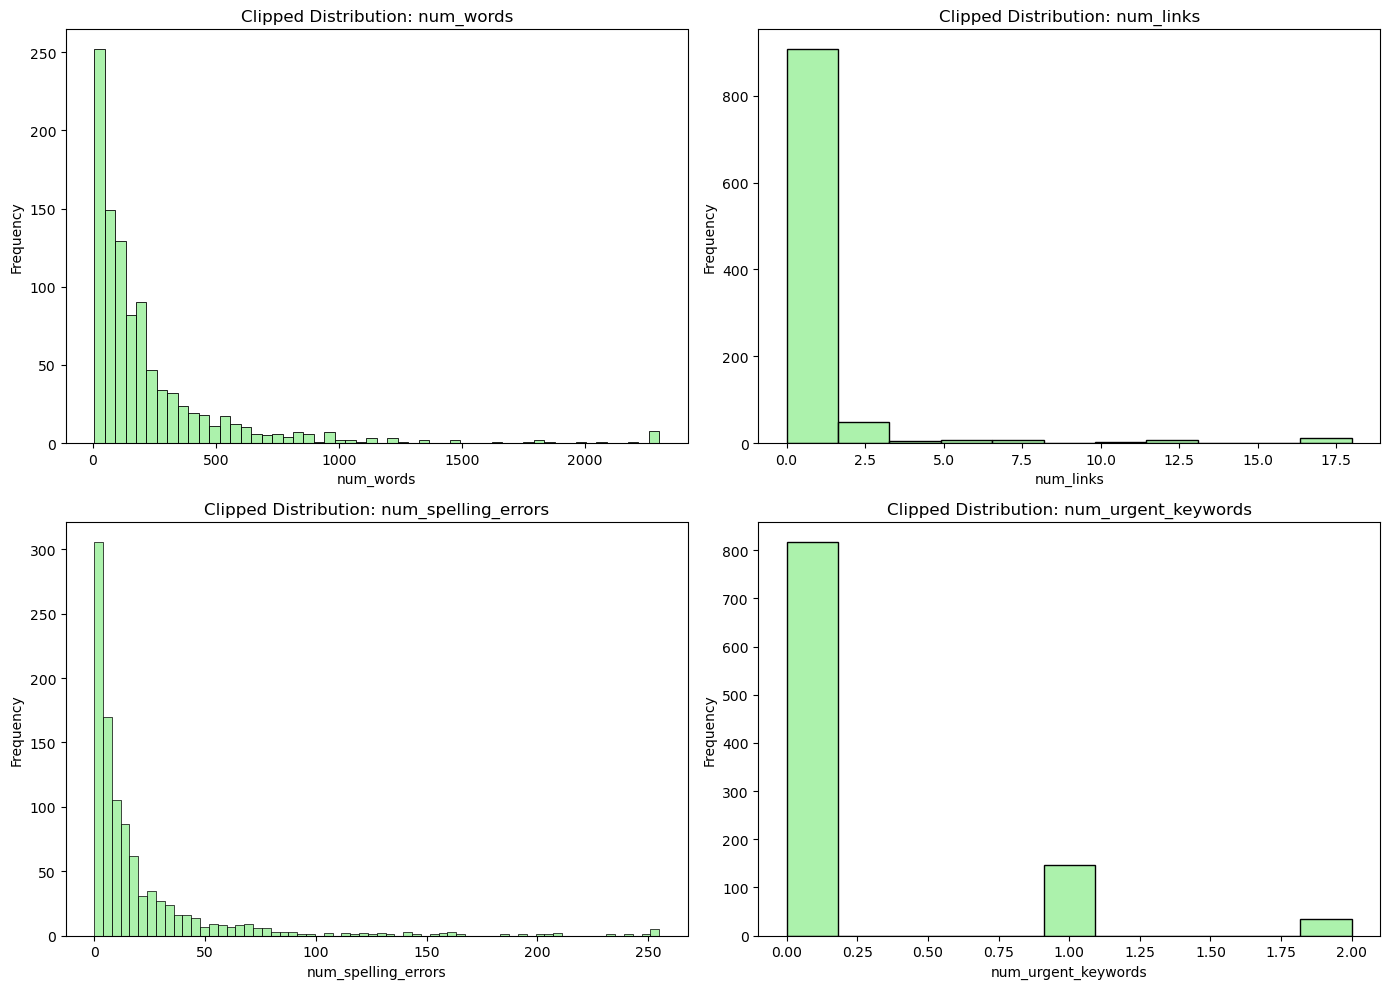

In [5]:
#Clipping Outliers

# List of features to clip
features = ['num_words', 'num_links', 'num_spelling_errors', 'num_urgent_keywords']

# Apply 1% to 99% quantile clipping
for col in features:
    lower = data[col].quantile(0.01)
    upper = data[col].quantile(0.99)
    data[col] = data[col].clip(lower=lower, upper=upper)

print("Outliers clipped for selected features.")

# Sample again and re-plot clipped data
df_clipped_sample = data.sample(n=1000, random_state=42)

# Create subplots for the distributions after clipping
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot each clipped feature
for i, col in enumerate(features):
    sns.histplot(df_clipped_sample[col], ax=axes[i], kde=False, color='lightgreen', edgecolor='black')
    axes[i].set_title(f'Clipped Distribution: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
#balance the dataset
import pandas as pd

# Assuming 'data' is your DataFrame and 'label' is the target column
class_0 = data[data['label'] == 0].sample(n=6000, random_state=42)
class_1 = data[data['label'] == 1].sample(n=6000, random_state=42)

# Combine the two classes into a balanced dataset
balanced_data = pd.concat([class_0, class_1])

# Shuffle the dataset to mix the classes
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


### Scaling the Data

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Feature scaling
data_scaled = pd.DataFrame(scaler.fit_transform(data_no_outliers.drop('label', axis=1)), columns=data_no_outliers.columns[:-1])

# Add the label column back to the scaled data
data_scaled['label'] = data_no_outliers['label']

print(f"Scaled data sample:\n{data_scaled.head()}")


Scaled data sample:
   num_words  num_unique_words  num_stopwords  num_links  num_unique_domains  \
0   0.034263          0.129298       0.017162        0.0                 0.0   
1   0.001224          0.006878       0.000330        0.0                 0.0   
2   0.008321          0.044017       0.004950        0.0                 0.0   
3   0.001468          0.008253       0.000660        0.0                 0.0   
4   0.002203          0.012380       0.000660        0.0                 0.0   

   num_email_addresses  num_spelling_errors  num_urgent_keywords  label  
0                  0.0                  0.0                  0.0    0.0  
1                  0.0                  0.0                  0.0    0.0  
2                  0.0                  0.0                  0.0    0.0  
3                  0.0                  0.0                  0.0    0.0  
4                  0.0                  0.0                  0.0    0.0  


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("C:\\Users\\fakru\\Downloads\\email_phishing_data.csv")

# Select columns to scale
columns_to_scale = [
    'num_words', 'num_unique_words', 'num_stopwords', 'num_links',
    'num_unique_domains', 'num_email_addresses', 'num_spelling_errors',
    'num_urgent_keywords'
]

# Apply standard scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(data[columns_to_scale])
scaled_data = pd.DataFrame(scaled, columns=columns_to_scale)

# Optional: Save or preview scaled data
print(scaled_data.head())


   num_words  num_unique_words  num_stopwords  num_links  num_unique_domains  \
0  -0.040842         -0.143891      -0.027406  -0.159841           -0.196012   
1  -0.081317         -0.585301      -0.077243  -0.159841           -0.196012   
2  -0.072622         -0.451390      -0.063563  -0.159841           -0.196012   
3  -0.081017         -0.580342      -0.076266  -0.159841           -0.196012   
4  -0.080117         -0.565463      -0.076266  -0.159841           -0.196012   

   num_email_addresses  num_spelling_errors  num_urgent_keywords  
0            -0.155591            -0.079325             -0.43857  
1            -0.155591            -0.079325             -0.43857  
2            -0.155591            -0.079325             -0.43857  
3            -0.155591            -0.079325             -0.43857  
4            -0.155591            -0.079325             -0.43857  


### Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split

# features and target
X = balanced_data.drop(columns=['label'])
y = balanced_data['label']

# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Testing and evaluation
#### Logistic Regression
#### Random Forest Classifier
#### K-Nearest Neighbors (KNN) Classifier

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

# Train models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


Logistic Regression Accuracy: 0.6308333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.51      0.58      1200
           1       0.60      0.76      0.67      1200

    accuracy                           0.63      2400
   macro avg       0.64      0.63      0.63      2400
weighted avg       0.64      0.63      0.63      2400

Random Forest Accuracy: 0.7908333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1200
           1       0.79      0.79      0.79      1200

    accuracy                           0.79      2400
   macro avg       0.79      0.79      0.79      2400
weighted avg       0.79      0.79      0.79      2400

KNN Accuracy: 0.7141666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.71      1200
           1       0.71      0.72      0

### Comparison Code Structure

In [18]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Modified function to extract metrics for class 0 and 1
def extract_metrics(report):
    lines = report.strip().split('\n')
    class_metrics = {}
    for line in lines:
        if line.strip().startswith('0') or line.strip().startswith('1'):
            parts = line.strip().split()
            label = parts[0]
            precision, recall, f1 = float(parts[1]), float(parts[2]), float(parts[3])
            class_metrics[label] = (precision, recall, f1)
    return class_metrics

# Generate classification reports
report_logreg = classification_report(y_test, y_pred_logreg)
report_rf = classification_report(y_test, y_pred_rf)
report_knn = classification_report(y_test, y_pred_knn)

# Extract metrics
log_metrics = extract_metrics(report_logreg)
rf_metrics = extract_metrics(report_rf)
knn_metrics = extract_metrics(report_knn)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_knn)
    ],
    'Precision (Class 0)': [log_metrics['0'][0], rf_metrics['0'][0], knn_metrics['0'][0]],
    'Recall (Class 0)': [log_metrics['0'][1], rf_metrics['0'][1], knn_metrics['0'][1]],
    'F1-Score (Class 0)': [log_metrics['0'][2], rf_metrics['0'][2], knn_metrics['0'][2]],
    'Precision (Class 1)': [log_metrics['1'][0], rf_metrics['1'][0], knn_metrics['1'][0]],
    'Recall (Class 1)': [log_metrics['1'][1], rf_metrics['1'][1], knn_metrics['1'][1]],
    'F1-Score (Class 1)': [log_metrics['1'][2], rf_metrics['1'][2], knn_metrics['1'][2]],
})

# Display the full table
pd.set_option('display.float_format', '{:.4f}'.format)
print("\n📊 Full Model Performance Comparison (Both Classes):")
print(comparison_df.to_string(index=False))



📊 Full Model Performance Comparison (Both Classes):
              Model  Accuracy  Precision (Class 0)  Recall (Class 0)  F1-Score (Class 0)  Precision (Class 1)  Recall (Class 1)  F1-Score (Class 1)
Logistic Regression    0.6308               0.6700            0.5100              0.5800               0.6000            0.7600              0.6700
      Random Forest    0.7908               0.7900            0.7900              0.7900               0.7900            0.7900              0.7900
                KNN    0.7142               0.7200            0.7100              0.7100               0.7100            0.7200              0.7200


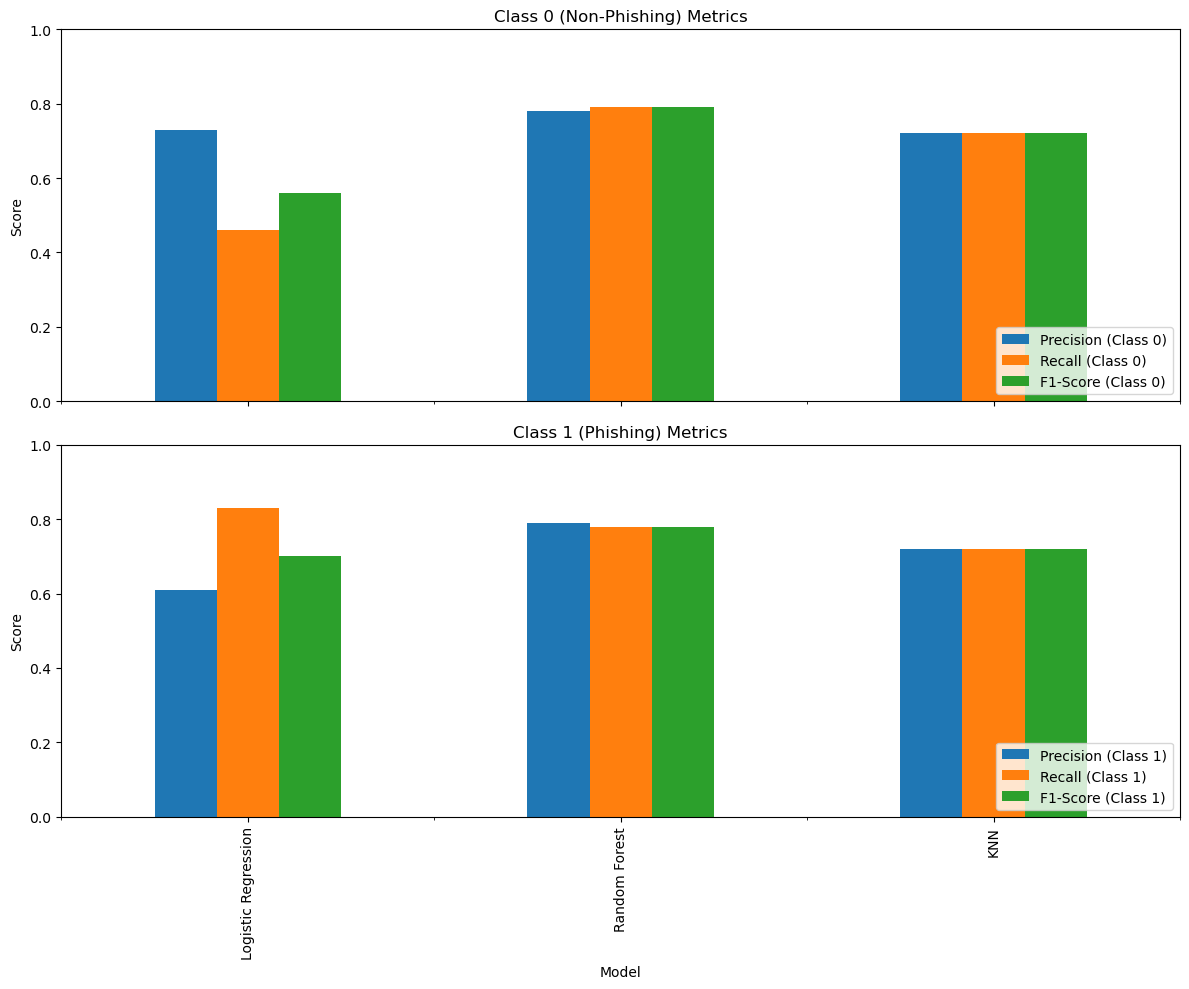

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Data based on your results
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'KNN'],
    'Accuracy': [0.6442, 0.7846, 0.7179],
    'Precision (Class 0)': [0.7300, 0.7800, 0.7200],
    'Recall (Class 0)': [0.4600, 0.7900, 0.7200],
    'F1-Score (Class 0)': [0.5600, 0.7900, 0.7200],
    'Precision (Class 1)': [0.6100, 0.7900, 0.7200],
    'Recall (Class 1)': [0.8300, 0.7800, 0.7200],
    'F1-Score (Class 1)': [0.7000, 0.7800, 0.7200]
}

df = pd.DataFrame(data)

# Set up the figure and axis
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot for Class 0 metrics
df.plot(x='Model', y=['Precision (Class 0)', 'Recall (Class 0)', 'F1-Score (Class 0)'],
        kind='bar', ax=axes[0], title='Class 0 (Non-Phishing) Metrics')
axes[0].set_ylabel("Score")
axes[0].set_ylim(0, 1)
axes[0].legend(loc='lower right')

# Plot for Class 1 metrics
df.plot(x='Model', y=['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)'],
        kind='bar', ax=axes[1], title='Class 1 (Phishing) Metrics')
axes[1].set_ylabel("Score")
axes[1].set_ylim(0, 1)
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()




We tested three models to detect phishing emails: Logistic Regression, Random Forest, and KNN. **Random Forest** worked best overall, with the highest accuracy (78.46%) and balanced results for both phishing and non-phishing emails. **KNN** did okay, giving consistent results, but not as strong. **Logistic Regression** had the lowest accuracy (64.42%) and struggled with non-phishing emails, but it was better at catching phishing ones. Overall, **Random Forest** is the most reliable choice for this task.
